In [51]:
#Question 1
%reset
from sympy import *
import numpy as np
import matplotlib.pyplot as plt


#a
Xu = -0.1
Xw = -0.05
Zu = -0.1
Zw = -0.2
Zq = -250.1
Mu = -0.1
Mw = -0.1
Mq = 0.1
U0 = 900 #km/hr

M = Matrix([[Xu,Xw,0],
            [Zu,Zw,(Zq-U0)],
            [Mu,Mw,Mq]])

null_space = M.nullspace()

for vector in null_space:
    print(vector)

if null_space:
    print(null_space)
else:
    print("Only Stable Point is [0,0,0]")

A = np.array([[Xu,Xw,0],
            [Zu,Zw,(Zq-U0)],
            [Mu,Mw,Mq]])
Aeig = np.linalg.eigvals(A)
Aeig

Once deleted, variables cannot be recovered. Proceed (y/[n])?  y


Only Stable Point is [0,0,0]


array([ -0.05000326, -10.80058111,  10.65058437])

In [52]:
#b
%reset
from sympy import *
import numpy as np
import matplotlib.pyplot as plt
Xu = -0.1
Xw = -0.05
Zu = -0.1
Zw = -0.2
Zq = -250.1
Mu = -0.1
Mw = -0.1
Mq = -0.2
U0 = 900 #km/hr

M = Matrix([[Xu,Xw,0],
            [Zu,Zw,(Zq-U0)],
            [Mu,Mw,Mq]])

null_space = M.nullspace()

# Display the null space
for vector in null_space:
    print(vector)

A = np.array([[Xu,Xw,0],
            [Zu,Zw,(Zq-U0)],
            [Mu,Mw,Mq]])
Aeig = np.linalg.eigvals(A)
Aeig

Once deleted, variables cannot be recovered. Proceed (y/[n])?  y


array([ -0.04999674, -10.94918572,  10.49918246])

In [48]:
#Question 2
%reset
from sympy import *
import numpy as np
import matplotlib.pyplot as plt


#a
print("If left alone X grows faster since it simplifies to 3x - x2 and the other goes to 2y - y2")

#b
t, x, y = symbols("t, x, y")


eq1 = Eq(0, x*(3 - x - 2*y))
eq2 = Eq(0, y*(2 - x - y))
soln = solve((eq1,eq2),(x,y))
print("The eq points are (x,y) :", soln)

#c
xd = x*(3 - x - 2*y)
yd = y*(2 - x - y)

dxdx = xd.diff(x)
dxdy = xd.diff(y)
dydx = yd.diff(x)
dydy = yd.diff(y)

J = Matrix([[dxdx, dxdy],
              [dydx, dydy]])
J00 = J.subs(x,0).subs(y,0)
J02 = J.subs(x,0).subs(y,2)
J11 = J.subs(x,1).subs(y,1)
J30 = J.subs(x,3).subs(y,0)

J00 = np.array([[3,0],[0,2]])
eigenvalsJ00 = np.linalg.eigvals(J00)

J02 = np.array([[-1,0],[-2,-2]])
eigenvalsJ02 = np.linalg.eigvals(J02)

J11 = np.array([[-1,-2],[-1,-1]])
eigenvalsJ11 = np.linalg.eigvals(J11)

J30 = np.array([[-3,-6],[0,-1]])
eigenvalsJ30 = np.linalg.eigvals(J30)

print("stablity")
print(eigenvalsJ00)
print(eigenvalsJ02)
print(eigenvalsJ11)
print(eigenvalsJ30)


Once deleted, variables cannot be recovered. Proceed (y/[n])?  y


If left alone X grows faster since it simplifies to 3x - x2 and the other goes to 2y - y2
The eq points are (x,y) : [(0, 0), (0, 2), (1, 1), (3, 0)]
stablity
[3. 2.]
[-2. -1.]
[ 0.41421356 -2.41421356]
[-3. -1.]


In [76]:
#Question 3
%reset
from sympy import *
import numpy as np
import matplotlib.pyplot as plt

#a
v, rad = symbols("v, rad")
r = 500
g = Matrix([9.81,0,0])
Delq   = Matrix([0,0,0])
U      = 0
QDD    = Matrix([v**2/r,0,0])
OMEGAD = Matrix([0,0,0])
q      = Matrix([0,0,0])
qd     = Matrix([0,0,0])
OMEGA  = Matrix([0,0,rad])

eq1 = Eq(v, rad*r)
eq2 = Eq(g, -Delq*U + QDD - OMEGAD.cross(q) + 2*qd.cross(OMEGA) + (OMEGA.cross(q)).cross(OMEGA))
soln = solve((eq1,eq2),(v, rad))

print(soln[1][1], "rads/s")
intial = soln[1][1]

#b
print("fire two. One is at [R,0,0] and [-R,0,0]. These would need to point the nozzel in the [0,1,0] and [0,-1,0] directions respectivly.")

#c 

v, rad = symbols("v, rad")

omegad = (2*np.pi)/(2/60)/((2*np.pi)/rad)**2


r = 500
g = Matrix([9.81,0,0])
Delq   = Matrix([0,0,0])
U      = 0
QDD    = Matrix([v**2/r,0,0])
OMEGAD = Matrix([0,0,omegad])
q      = Matrix([0,0,0])
qd     = Matrix([0,0,0])
OMEGA  = Matrix([0,0,rad])

eq1 = Eq(v, rad*r)
eq2 = Eq(7*g, -Delq*U + QDD - OMEGAD.cross(q) + 2*qd.cross(OMEGA) + (OMEGA.cross(q)).cross(OMEGA))
soln = solve((eq1,eq2),(v, rad))

final = soln[1][1]
cur = intial
p = 0
dt = .01
while cur < final:
    cur = cur + omegad.subs(rad, cur)*dt
    p = p +1
    
time = p*dt
print("you have:", time, "seconds")

#d
print("Centrifugal, this is what you actually feel")

Once deleted, variables cannot be recovered. Proceed (y/[n])?  y


0.140071410359145 rads/s
fire two. One is at [R,0,0] and [-R,0,0]. These would need to point the nozzel in the [0,1,0] and [0,-1,0] directions respectivly.
you have: 0.9400000000000001 seconds
Centrifugal, this is what you actually feel


In [122]:
#Question 4
%reset
from sympy import *
import numpy as np
import matplotlib.pyplot as plt

#a
g = 9.81
a = g*9

t = symbols("t")
x = 0
y = 0
xd = 250
yd = 0

xdd = a*sqrt(2)
ydd = -a*sqrt(2)

qdd = Matrix([xdd,ydd])

psi  = 0.0
psid  = 0.0

p = 0
dt = 0.01

while psi > -1.57:
    xd =( xd + qdd[0]*dt).evalf()
    yd =( yd + qdd[1]*dt).evalf()
    
    x = (x + xd*dt).evalf()
    y = (y + yd*dt).evalf()
    
    psi  = psi + psid*dt
    
    r = (xd**2 + yd**2)/(a*sqrt(2))
    
    psid = -(sqrt(xd**2 + yd**2)/r).evalf()
    
    R = Matrix([[cos(psi),-sin(psi)],
                [sin(psi),cos(psi)]])
    qdd[0] = a*sqrt(2)*cos(psi*2)
    qdd[1] = a*sqrt(2)*sin(psi+(np.pi/4))
    p = p + 1
    
while sqrt(xd**2 + yd**2) < 514.5:
    xd = xd + a*dt
    p = p + 1

print("Time is ", p*dt, " seconds")

#b
zdd = g
maxbank = acos(g/a)
print("The max bank",maxbank, "rads")

Once deleted, variables cannot be recovered. Proceed (y/[n])?  y


Time is  7.47  seconds
The max bank 1.45945531245393 rads


In [33]:
#Question 5
%reset
from sympy import *
import numpy as np
import matplotlib.pyplot as plt

#b
Ixx = 600 #kg m2
Iyy = 500 #kg m2
Izz = 500 #kg m2

wx_t = np.array([0.1])
wy_t = np.array([0.2])
wz_t = np.array([0.1])


Tmax = 10*60
dt   = 0.01

wX, wY, wZ = symbols("wX, wY, wZ")

wXd = (Iyy - Izz)*wY*wZ / Ixx
wYd = (Izz - Ixx)*wZ*wX / Iyy
wZd = (Ixx - Iyy)*wX*wY / Izz

wxd_t = np.array([wXd.subs(wX,wx_t[0]).subs(wY,wy_t[0]).subs(wZ,wz_t[0])])
wyd_t = np.array([wYd.subs(wX,wx_t[0]).subs(wY,wy_t[0]).subs(wZ,wz_t[0])])
wzd_t = np.array([wZd.subs(wX,wx_t[0]).subs(wY,wy_t[0]).subs(wZ,wz_t[0])])

#q0_t      = np.array([0.701589698775332])
#q1_t      = np.array([-0.0881583494193194])
#q2_t      = np.array([0.0881583494193194])
#q3_t      = np.array([0.701589698775332])

q0_t      = np.array([1])
q1_t      = np.array([0])
q2_t      = np.array([0])
q3_t      = np.array([0])

q0d_t      = np.array([-0.5*(-wx_t[0]*q1_t[0] - wy_t[0]*q3_t[0] - wz_t[0]*q3_t[0])])
q1d_t      = np.array([-0.5*( wx_t[0]*q0_t[0] + wy_t[0]*q3_t[0] - wz_t[0]*q2_t[0])])
q2d_t      = np.array([-0.5*(-wx_t[0]*q3_t[0] + wy_t[0]*q0_t[0] + wz_t[0]*q1_t[0])])
q3d_t      = np.array([-0.5*( wx_t[0]*q2_t[0] - wy_t[0]*q1_t[0] + wz_t[0]*q0_t[0])])


T = np.array([0])

p = 0

while (T[p] < Tmax):
    
    wx_t     = np.append(wx_t,      wx_t[p]      + wxd_t[p]    * dt)
    wy_t     = np.append(wy_t,      wy_t[p]      + wyd_t[p]    * dt)
    wz_t     = np.append(wz_t,      wz_t[p]      + wzd_t[p]    * dt)
    
    q0d_t    = np.append(q0d_t,   -0.5*(-wx_t[p]*q1_t[p] - wy_t[p]*q2_t[p] - wz_t[p]*q3_t[p])) 
    q1d_t    = np.append(q1d_t,   -0.5*( wx_t[p]*q0_t[p] + wy_t[p]*q3_t[p] - wz_t[p]*q2_t[p])) 
    q2d_t    = np.append(q2d_t,   -0.5*(-wx_t[p]*q3_t[p] + wy_t[p]*q0_t[p] + wz_t[p]*q1_t[p]))
    q3d_t    = np.append(q3d_t,   -0.5*( wx_t[p]*q2_t[p] - wy_t[p]*q1_t[p] + wz_t[p]*q0_t[p])) 
    
    q0_t     = np.append(q0_t,     q0_t[p]      + q0d_t[p]     * dt) 
    q1_t     = np.append(q1_t,     q1_t[p]      + q1d_t[p]     * dt) 
    q2_t     = np.append(q2_t,     q2_t[p]      + q2d_t[p]     * dt) 
    q3_t     = np.append(q3_t,     q3_t[p]      + q3d_t[p]     * dt) 
    
    wxd_t    = np.append(wxd_t,    wXd.subs(wX,wx_t[p]).subs(wY,wy_t[p]).subs(wZ,wz_t[p]))
    wyd_t    = np.append(wyd_t,    wYd.subs(wX,wx_t[p]).subs(wY,wy_t[p]).subs(wZ,wz_t[p]))
    wzd_t    = np.append(wzd_t,    wZd.subs(wX,wx_t[p]).subs(wY,wy_t[p]).subs(wZ,wz_t[p]))
    
    T = np.append(T,T[p] + dt)
    
    if p % 10000 == 0:
        print(p*dt)
    p = p + 1 


Once deleted, variables cannot be recovered. Proceed (y/[n])?  y


0.0
100.0
200.0
300.0
400.0
500.0
600.0


In [34]:
#quaternians to euler
t = symbols("t")

q0     = Function('q0')(t)
q1     = Function('q1')(t)
q2     = Function('q2')(t)
q3     = Function('q3')(t)

phi   = atan2(2*(q0*q1 + q2*q3), q0**2 - q1**2 - q2**2 + q3**2)
theta = asin(2*(q0*q2 - q3*q1))
psi   = atan2(2*(q0*q3 + q2*q1), q0**2 + q1**2 - q2**2 - q3**2)

phi_t   = np.array([])
theta_t = np.array([])
psi_t   = np.array([])

T_ = np.array([])

i = 0

while i < len(q0_t):
    phi_t = np.append(phi_t, phi.subs(q0,q0_t[i]).subs(q1,q1_t[i]).subs(q2,q2_t[i]).subs(q3,q3_t[i]).as_real_imag()[0])
    theta_t = np.append(theta_t, theta.subs(q0,q0_t[i]).subs(q1,q1_t[i]).subs(q2,q2_t[i]).subs(q3,q3_t[i]).as_real_imag()[0])
    psi_t = np.append(psi_t, psi.subs(q0,q0_t[i]).subs(q1,q1_t[i]).subs(q2,q2_t[i]).subs(q3,q3_t[i]).as_real_imag()[0])
    
    T_    =  np.append(T_, T[i])
    
    i = i + 100
    
    if i % 10000 == 0:
        print(i*dt)
        
        
for i in range(len(phi_t)):
    if phi_t[i] == nan:
        phi_t[i] = 0
    if theta_t[i] == nan:
        theta_t[i] = 0
    if psi_t[i] == nan:
        psi_t[i] = 0

100.0
200.0
300.0
400.0
500.0
600.0


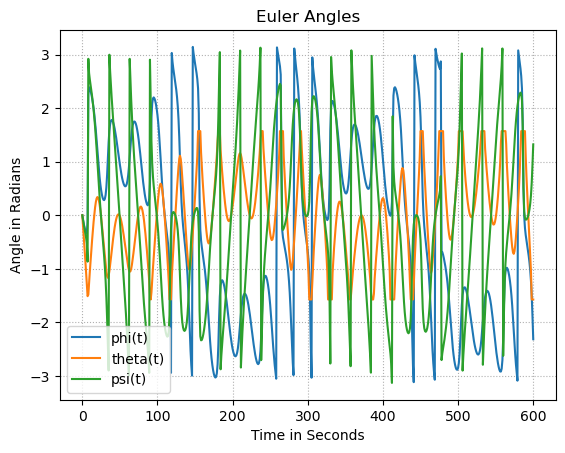

In [37]:
plt.plot(T_, phi_t, label='phi(t)')
plt.plot(T_, theta_t, label='theta(t)')
plt.plot(T_, psi_t, label='psi(t)')

plt.xlabel('Time in Seconds')
plt.ylabel('Angle in Radians')
plt.title('Euler Angles')
plt.grid(True, linestyle =':')

plt.legend()

plt.show()
